In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
drinks = pd.read_csv("drinks.txt")

In [3]:
drinks.head()

RowID Distillery  Body  Sweetness  Smoky  Medicinal  Tobacco  Honey  Spicy  \
0      1  Aberfeldy     2          2      2          0        0      2      1   
1      2   Aberlour     3          3      1          0        0      4      3   
2      3     AnCnoc     1          3      2          0        0      2      0   
3      4     Ardbeg     4          1      4          4        0      0      2   
4      5    Ardmore     2          2      2          0        0      1      1   

   Winey  Nutty  Malty  Fruity  Floral     Postcode   Latitude   Longitude  
0      2      2      2       2       2   \tPH15 2EB     286580      749680  
1      2      2      3       3       2   \tAB38 9PJ     326340      842570  
2      0      2      2       3       2    \tAB5 5LI     352960      839320  
3      0      1      2       1       0   \tPA42 7EB     141560      646220  
4      1      2      3       1       1   \tAB54 4NH     355350      829140

In [4]:
drinks["Region"] = pd.read_csv("regions.txt")

In [5]:
drinks.columns   # there are spaces in some column names

Index(['RowID', 'Distillery', 'Body', 'Sweetness', 'Smoky', 'Medicinal',
       'Tobacco', 'Honey', 'Spicy', 'Winey', 'Nutty', 'Malty', 'Fruity',
       'Floral', 'Postcode', ' Latitude', ' Longitude', 'Region'],
      dtype='object')

In [6]:
drinks.rename(columns={" Latitude":"Latitude", " Longitude":"Longitude" }, inplace=True)  # remove spaces

In [7]:
drinks.head(5)  #producer's name, location; and scores for 12 flavor categories of their product (between 1-4)

RowID Distillery  Body  Sweetness  Smoky  Medicinal  Tobacco  Honey  Spicy  \
0      1  Aberfeldy     2          2      2          0        0      2      1   
1      2   Aberlour     3          3      1          0        0      4      3   
2      3     AnCnoc     1          3      2          0        0      2      0   
3      4     Ardbeg     4          1      4          4        0      0      2   
4      5    Ardmore     2          2      2          0        0      1      1   

   Winey  Nutty  Malty  Fruity  Floral     Postcode  Latitude  Longitude  \
0      2      2      2       2       2   \tPH15 2EB    286580     749680   
1      2      2      3       3       2   \tAB38 9PJ    326340     842570   
2      0      2      2       3       2    \tAB5 5LI    352960     839320   
3      0      1      2       1       0   \tPA42 7EB    141560     646220   
4      1      2      3       1       1   \tAB54 4NH    355350     829140   

      Region  
0  Highlands  
1   Speyside  
2  Highlands  
3      Islay  
4  Highlands

In [8]:
drinks.tail()

RowID    Distillery  Body  Sweetness  Smoky  Medicinal  Tobacco  Honey  \
81     82     Tobermory     1          1      1          0        0      1   
82     83       Tomatin     2          3      2          0        0      2   
83     84     Tomintoul     0          3      1          0        0      2   
84     85       Tormore     2          2      1          0        0      1   
85     86  Tullibardine     2          3      0          0        1      0   

    Spicy  Winey  Nutty  Malty  Fruity  Floral   Postcode  Latitude  \
81      0      0      1      2       2       2   PA75 6NR    150450   
82      2      1      1      2       0       1   IV13 7YT    279120   
83      2      1      1      2       1       2   AB37 9AQ    315100   
84      0      1      2      1       0       0   PH26 3LR    315180   
85      2      1      1      2       2       1    PH4 1QG    289690   

    Longitude     Region  
81     755070    Islands  
82     829630  Highlands  
83     825560   Speyside  
84     834960   Speyside  
85     708850  Highlands

In [9]:
flavors = drinks.loc[:,"Body":"Floral"]

In [10]:
flavors.head()

Body  Sweetness  Smoky  Medicinal  Tobacco  Honey  Spicy  Winey  Nutty  \
0     2          2      2          0        0      2      1      2      2   
1     3          3      1          0        0      4      3      2      2   
2     1          3      2          0        0      2      0      0      2   
3     4          1      4          4        0      0      2      0      1   
4     2          2      2          0        0      1      1      1      2   

   Malty  Fruity  Floral  
0      2       2       2  
1      3       3       2  
2      2       3       2  
3      2       1       0  
4      3       1       1

In [11]:
coFlavors = flavors.corr()  # calculate Pearson's correlation coefficients matrix

In [12]:
coFlavors
# if two flavor scores increase-decrease together linearly in many samples, the coefficient approaches 1.0
# if one flavor score tends to increase when the other decreases, the coefficient is negative

Body  Sweetness     Smoky  Medicinal   Tobacco     Honey  \
Body       1.000000  -0.136518  0.524032   0.354050  0.168718  0.082031   
Sweetness -0.136518   1.000000 -0.405897  -0.392017 -0.147871  0.132558   
Smoky      0.524032  -0.405897  1.000000   0.686071  0.365501 -0.195318   
Medicinal  0.354050  -0.392017  0.686071   1.000000  0.425106 -0.396629   
Tobacco    0.168718  -0.147871  0.365501   0.425106  1.000000 -0.275490   
Honey      0.082031   0.132558 -0.195318  -0.396629 -0.275490  1.000000   
Spicy      0.188500  -0.054200  0.231745   0.044903  0.054068  0.139563   
Winey      0.408576   0.115727 -0.028190  -0.202651  0.009097  0.362021   
Nutty      0.126323  -0.032493 -0.023132  -0.113671 -0.117717  0.188492   
Malty     -0.116859  -0.001516 -0.192875  -0.258959 -0.059347  0.310184   
Fruity    -0.013205   0.019820 -0.312970  -0.330975 -0.235145  0.108822   
Floral    -0.461203   0.144987 -0.431663  -0.511323 -0.212375  0.183029   

              Spicy     Winey     Nutty     Malty    Fruity    Floral  
Body       0.188500  0.408576  0.126323 -0.116859 -0.013205 -0.461203  
Sweetness -0.054200  0.115727 -0.032493 -0.001516  0.019820  0.144987  
Smoky      0.231745 -0.028190 -0.023132 -0.192875 -0.312970 -0.431663  
Medicinal  0.044903 -0.202651 -0.113671 -0.258959 -0.330975 -0.511323  
Tobacco    0.054068  0.009097 -0.117717 -0.059347 -0.235145 -0.212375  
Honey      0.139563  0.362021  0.188492  0.310184  0.108822  0.183029  
Spicy      1.000000  0.092704 -0.042856  0.036303  0.144714  0.034663  
Winey      0.092704  1.000000  0.198467  0.112368  0.090694 -0.126932  
Nutty     -0.042856  0.198467  1.000000  0.066157  0.071765  0.018302  
Malty      0.036303  0.112368  0.066157  1.000000  0.207288  0.106309  
Fruity     0.144714  0.090694  0.071765  0.207288  1.000000  0.262336  
Floral     0.034663 -0.126932  0.018302  0.106309  0.262336  1.000000

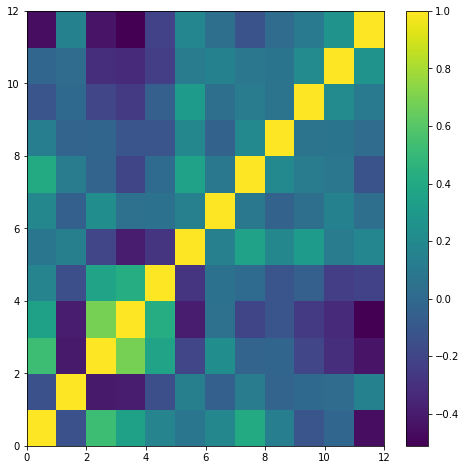

In [13]:
plt.figure(figsize=(8, 8))
plt.pcolor(coFlavors)  # the matrix is visualized below
plt.colorbar();  # unable to label the axes with column names, so will try another visualization library 

In [14]:
#import seaborn as sns
#fig = plt.figure(figsize=(8,8))
#sns.heatmap(coFlavors);   # the same matrix could be visualized again using seaborn

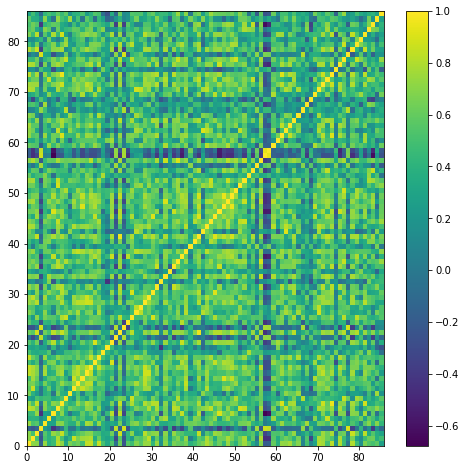

In [15]:
coDrinks = flavors.T.corr() # taking transpose of the dataframe 
plt.figure(figsize=(8,8)) # to arrive at the correlations of flavor scores 
plt.pcolor(coDrinks)  # between each distillery product (drink)
plt.axis("tight")
plt.colorbar();

In [16]:
#fig = plt.figure(figsize=(8,8))
#sns.heatmap(coDrinks);

In [17]:
drinks.Region.describe()

count           86
unique           6
top       Speyside
freq            43
Name: Region, dtype: object

In [18]:
drinks.Region.unique()

array(['Highlands', 'Speyside', 'Islay', 'Islands', 'Lowlands',
       'Campbelltown'], dtype=object)

Biclustering algorithms simultaneously cluster rows and columns of a data matrix. These clusters of rows and columns are known as biclusters.
For visualization purposes, given a bicluster, the rows and columns of the data matrix may be rearranged to make the bicluster contiguous.

If each row and each column belongs to exactly one bicluster, then rearranging the rows and columns of the data matrix reveals the biclusters on the diagonal.

In [19]:
from sklearn.cluster.bicluster import SpectralCoclustering

The SpectralCoclustering algorithm finds biclusters with values higher than those in the corresponding other rows and columns. Each row and each column belongs to exactly one bicluster, so rearranging the rows and columns to make partitions contiguous reveals these high values along the diagonal.


The algorithm treats the input data matrix as a bipartite graph: the rows and columns of the matrix correspond to the two sets of vertices, and each entry corresponds to an edge between a row and a column. The algorithm approximates the normalized cut of this graph to find heavy subgraphs.

In [20]:
model = SpectralCoclustering(n_clusters=6, random_state=0, ) # 6 clusters because there are 6 regions

In [21]:
model.fit(coDrinks)

SpectralCoclustering(init='k-means++', mini_batch=False, n_clusters=6,
           n_init=10, n_jobs=1, n_svd_vecs=None, random_state=0,
           svd_method='randomized')

In [22]:
model.row_labels_ # 6 different values, which observation belongs to which cluster?

array([5, 2, 3, 4, 5, 0, 3, 2, 5, 3, 2, 0, 5, 0, 5, 5, 0, 5, 0, 1, 3, 4, 3,
       4, 3, 3, 2, 2, 3, 2, 3, 5, 0, 0, 0, 5, 2, 3, 0, 1, 0, 3, 2, 2, 2, 0,
       5, 0, 0, 3, 3, 2, 2, 2, 0, 1, 5, 4, 4, 0, 3, 5, 2, 5, 5, 2, 1, 5, 1,
       0, 2, 5, 0, 5, 2, 5, 3, 4, 5, 3, 0, 3, 2, 0, 2, 0], dtype=int32)

In [23]:
model.column_labels_  # identical with row labels!

array([5, 2, 3, 4, 5, 0, 3, 2, 5, 3, 2, 0, 5, 0, 5, 5, 0, 5, 0, 1, 3, 4, 3,
       4, 3, 3, 2, 2, 3, 2, 3, 5, 0, 0, 0, 5, 2, 3, 0, 1, 0, 3, 2, 2, 2, 0,
       5, 0, 0, 3, 3, 2, 2, 2, 0, 1, 5, 4, 4, 0, 3, 5, 2, 5, 5, 2, 1, 5, 1,
       0, 2, 5, 0, 5, 2, 5, 3, 4, 5, 3, 0, 3, 2, 0, 2, 0], dtype=int32)

In [24]:
model.rows_ # 6x86 (nr. of clusters * nr. of observations).
# Each row specifies whether each of 86 drinks is in that cluster # 

array([[False, False, False, False, False,  True, False, False, False,
        False, False,  True, False,  True, False, False,  True, False,
         True, False, False, False, False, False, False, False, False,
        False, False, False, False, False,  True,  True,  True, False,
        False, False,  True, False,  True, False, False, False, False,
         True, False,  True,  True, False, False, False, False, False,
         True, False, False, False, False,  True, False, False, False,
        False, False, False, False, False, False,  True, False, False,
         True, False, False, False, False, False, False, False,  True,
        False, False,  True, False,  True],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False,  Tru

In [25]:
np.sum(model.rows_, axis=1) # how many observations (drinks) belong to each cluster?

array([20,  5, 19, 17,  6, 19])

In [26]:
np.sum(model.rows_) # they add up to 86

86

In [27]:
drinks.Region.value_counts()

Speyside        43
Highlands       25
Islay            7
Islands          6
Lowlands         3
Campbelltown     2
Name: Region, dtype: int64

In [28]:
drinks["Group"] = pd.Series(model.row_labels_, index=drinks.index)  # append cluster labels to observations

In [29]:
drinks.index

RangeIndex(start=0, stop=86, step=1)

In [30]:
drinks.head(10)

RowID    Distillery  Body  Sweetness  Smoky  Medicinal  Tobacco  Honey  \
0      1     Aberfeldy     2          2      2          0        0      2   
1      2      Aberlour     3          3      1          0        0      4   
2      3        AnCnoc     1          3      2          0        0      2   
3      4        Ardbeg     4          1      4          4        0      0   
4      5       Ardmore     2          2      2          0        0      1   
5      6   ArranIsleOf     2          3      1          1        0      1   
6      7  Auchentoshan     0          2      0          0        0      1   
7      8     Auchroisk     2          3      1          0        0      2   
8      9      Aultmore     2          2      1          0        0      1   
9     10      Balblair     2          3      2          1        0      0   

   Spicy  Winey  Nutty  Malty  Fruity  Floral     Postcode  Latitude  \
0      1      2      2      2       2       2   \tPH15 2EB    286580   
1      3      2      2      3       3       2   \tAB38 9PJ    326340   
2      0      0      2      2       3       2    \tAB5 5LI    352960   
3      2      0      1      2       1       0   \tPA42 7EB    141560   
4      1      1      2      3       1       1   \tAB54 4NH    355350   
5      1      1      0      1       1       2     KA27 8HJ    194050   
6      1      0      2      2       3       3      G81 4SJ    247670   
7      1      2      2      2       2       1   \tAB55 3XS    340754   
8      0      0      2      2       2       2   \tAB55 3QY    340754   
9      2      0      2      1       2       1   \tIV19 1LB    270820   

   Longitude     Region  Group  
0     749680  Highlands      5  
1     842570   Speyside      2  
2     839320  Highlands      3  
3     646220      Islay      4  
4     829140  Highlands      5  
5     649950    Islands      0  
6     672610   Lowlands      3  
7     848623   Speyside      2  
8     848623   Speyside      5  
9     885770  Highlands      3

In [31]:
drinks = drinks.ix[np.argsort(model.row_labels_)] #reorder rows in increasing order by group labels
# .ix changes the order of appearance, but leaves the indices the same

In [32]:
drinks.head(10) # index is RowID-1, unordered

RowID          Distillery  Body  Sweetness  Smoky  Medicinal  Tobacco  \
85     86        Tullibardine     2          3      0          0        1   
33     34           GlenElgin     2          3      1          0        0   
32     33  GlenDeveronMacduff     2          3      1          1        1   
40     41            GlenSpey     1          3      1          0        0   
45     46         Glenfiddich     1          3      1          0        0   
47     48         Glenkinchie     1          2      1          0        0   
48     49           Glenlivet     2          3      1          0        0   
54     55           Inchgower     1          3      1          1        0   
18     19             Bowmore     2          2      3          1        0   
34     35         GlenGarioch     2          1      3          0        0   

    Honey  Spicy  Winey  Nutty  Malty  Fruity  Floral     Postcode  Latitude  \
85      0      2      1      1      2       2       1      PH4 1QG    289690   
33      2      1      1      1      1       2       3     IV30 3SL    322640   
32      1      1      2      0      2       0       1      AB4 3JT    372120   
40      0      1      1      1      2       0       2     AB38 7AU    327760   
45      0      0      0      0      2       2       2     AB55 4DH    332680   
47      1      2      0      0      2       2       2     EH34 5ET    344380   
48      2      2      2      1      2       2       3     AB37 9DB    319560   
54      2      2      0      1      2       1       2     AB56 5AB    342610   
18      2      2      1      1      1       1       2   \tPA43 7GS    131330   
34      0      3      1      0      2       2       2     AB51 0ES    381020   

    Longitude     Region  Group  
85     708850  Highlands      0  
33     861040   Speyside      0  
32     860400   Speyside      0  
40     849140   Speyside      0  
45     840840   Speyside      0  
47     666690   Lowlands      0  
48     828780   Speyside      0  
54     863970   Speyside      0  
18     659720      Islay      0  
34     827590  Highlands      0

In [33]:
drinks = drinks.reset_index(drop=True)

In [34]:
drinks.head(10) # index is ordered as well as group

RowID          Distillery  Body  Sweetness  Smoky  Medicinal  Tobacco  \
0     86        Tullibardine     2          3      0          0        1   
1     34           GlenElgin     2          3      1          0        0   
2     33  GlenDeveronMacduff     2          3      1          1        1   
3     41            GlenSpey     1          3      1          0        0   
4     46         Glenfiddich     1          3      1          0        0   
5     48         Glenkinchie     1          2      1          0        0   
6     49           Glenlivet     2          3      1          0        0   
7     55           Inchgower     1          3      1          1        0   
8     19             Bowmore     2          2      3          1        0   
9     35         GlenGarioch     2          1      3          0        0   

   Honey  Spicy  Winey  Nutty  Malty  Fruity  Floral     Postcode  Latitude  \
0      0      2      1      1      2       2       1      PH4 1QG    289690   
1      2      1      1      1      1       2       3     IV30 3SL    322640   
2      1      1      2      0      2       0       1      AB4 3JT    372120   
3      0      1      1      1      2       0       2     AB38 7AU    327760   
4      0      0      0      0      2       2       2     AB55 4DH    332680   
5      1      2      0      0      2       2       2     EH34 5ET    344380   
6      2      2      2      1      2       2       3     AB37 9DB    319560   
7      2      2      0      1      2       1       2     AB56 5AB    342610   
8      2      2      1      1      1       1       2   \tPA43 7GS    131330   
9      0      3      1      0      2       2       2     AB51 0ES    381020   

   Longitude     Region  Group  
0     708850  Highlands      0  
1     861040   Speyside      0  
2     860400   Speyside      0  
3     849140   Speyside      0  
4     840840   Speyside      0  
5     666690   Lowlands      0  
6     828780   Speyside      0  
7     863970   Speyside      0  
8     659720      Islay      0  
9     827590  Highlands      0

In [35]:
correlations = drinks.iloc[:, 2:14].T.corr()

In [36]:
correlations = np.array(correlations)

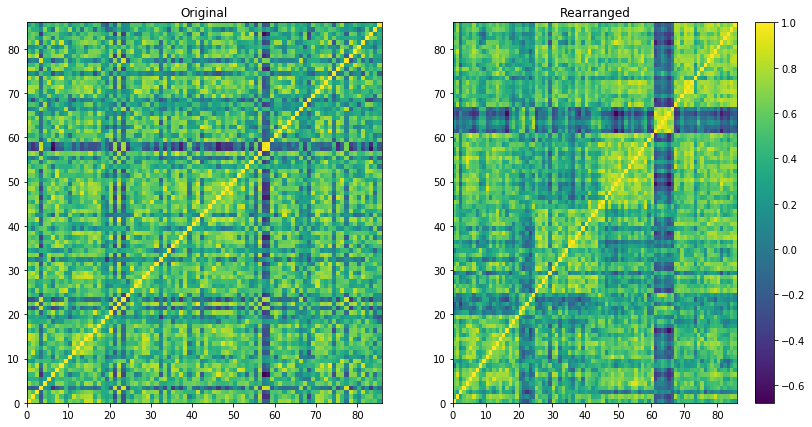

In [37]:
plt.figure(figsize=(14,7))
plt.subplot(121)
plt.pcolor(coDrinks)
plt.title("Original")
plt.axis("tight")
plt.subplot(122)
plt.pcolor(correlations)
plt.title("Rearranged")
plt.axis("tight")
plt.colorbar();

In [38]:
data = pd.Series([1,2,3,4]) 
data = data.ix[[3,0,1,2]]
data  # reordered but indices are same

3    4
0    1
1    2
2    3
dtype: int64

In [39]:
data = data.reset_index(drop=True)
data  # indices have changed

0    4
1    1
2    2
3    3
dtype: int64

In [40]:
data = data.ix[[3,0,1,2]]

In [41]:
data  # reordered again

3    3
0    4
1    1
2    2
dtype: int64

In [42]:

from bokeh.models import HoverTool, ColumnDataSource
from bokeh.plotting import figure
from bokeh.charts import Bar, output_file, show
from bokeh.io import output_notebook, push_notebook, show

In [43]:
cluster_colors = ["red", "orange", "green", "blue", "purple", "cyan"]
regions = ["Speyside", "Highlands", "Lowlands", "Islands", "Campbelltown", "Islay"]

region_colors = dict(zip(regions,cluster_colors))
print(region_colors)

{'Highlands': 'orange', 'Islands': 'blue', 'Speyside': 'red', 'Islay': 'cyan', 'Lowlands': 'green', 'Campbelltown': 'purple'}


In [44]:
distilleries = list(drinks.Distillery)
correlation_colors = []
for i in range(len(distilleries)):
    for j in range(len(distilleries)):
        if correlations[i,j] < 0.6:                    # if low correlation,
            correlation_colors.append('white')         # just use white.
        else:                                          # otherwise,
            if drinks.Group[i]==drinks.Group[j]:       # if the groups match,
                correlation_colors.append(cluster_colors[drinks.Group[i]]) # color them by their mutual group.
            else:                                      # otherwise
                correlation_colors.append('lightgray') # color them lightgray.

In [45]:
correlation_colors[0:10]

['red',
 'white',
 'white',
 'white',
 'red',
 'red',
 'white',
 'white',
 'white',
 'white']

In [46]:
correlations

array([[ 1.        ,  0.44904168,  0.46216816, ...,  0.50475261,
         0.34921515,  0.26722197],
       [ 0.44904168,  1.        ,  0.28977485, ...,  0.62335961,
         0.74444508,  0.7000808 ],
       [ 0.46216816,  0.28977485,  1.        , ...,  0.03309517,
         0.07784989,  0.16547585],
       ..., 
       [ 0.50475261,  0.62335961,  0.03309517, ...,  1.        ,
         0.76520727,  0.6626506 ],
       [ 0.34921515,  0.74444508,  0.07784989, ...,  0.76520727,
         1.        ,  0.76520727],
       [ 0.26722197,  0.7000808 ,  0.16547585, ...,  0.6626506 ,
         0.76520727,  1.        ]])

In [47]:
source = ColumnDataSource(
    data = {
        "x": np.repeat(distilleries,len(distilleries)),
        "y": list(distilleries)*len(distilleries),
        "colors": correlation_colors,
        "alphas": correlations.flatten(),
        "correlations": correlations.flatten()
    }
)

output_notebook()
fig = figure(title="Drink Correlations",
    x_axis_location="above", tools="resize,hover,save",
    x_range=list(reversed(distilleries)), y_range=distilleries)
fig.grid.grid_line_color = None
fig.axis.axis_line_color = None
fig.axis.major_tick_line_color = None
fig.axis.major_label_text_font_size = "6pt"
fig.xaxis.major_label_orientation = np.pi / 3

fig.rect('x', 'y', .9, .9, source=source,
     color='colors', alpha='alphas')
hover = fig.select(dict(type=HoverTool))
hover.tooltips = {
    "Drinks": "@x, @y",
    "Correlation": "@correlations",
}
show(fig)

Loading BokehJS ...

In [48]:
distilleries[:10]

['Tullibardine',
 'GlenElgin',
 'GlenDeveronMacduff',
 'GlenSpey',
 'Glenfiddich',
 'Glenkinchie',
 'Glenlivet',
 'Inchgower',
 'Bowmore',
 'GlenGarioch']

In [52]:
def location_plot(title, colors):
    output_notebook()
    output_file(title+".html")
    location_source = ColumnDataSource(
        data={
            "x": drinks["Latitude"],
            "y": drinks["Longitude"],
            "colors": colors,
            "regions": drinks.Region,
            "distilleries": drinks.Distillery
        }
    )

    fig = figure(title = title,
        x_axis_location = "above", tools="resize, hover, save")
    fig.plot_width  = 400
    fig.plot_height = 500
    fig.circle( "x", "y", size=9, source=location_source,
         color='colors', line_color = None)
    fig.xaxis.major_label_orientation = np.pi / 3
    hover = fig.select(dict(type = HoverTool))
    hover.tooltips = {
        "Distillery": "@distilleries",
        "Location": "(@x, @y)"
    }
    show(fig)

region_cols = [region_colors[r] for r in drinks.Region]
location_plot("Drink Locations and Regions", region_cols)

Loading BokehJS ...

In [53]:
region_cols = [region_colors[r] for r in drinks.Region]
classification_cols = [cluster_colors[g] for g in drinks.Group]
#location_plot("Drink Locations and Regions", region_cols)
location_plot("Drink Locations and Groups", classification_cols)

Loading BokehJS ...

In the figures above, there is not very much overlap between the regional classifications
and the co-clustering classifications. This implies that regional classifications are not
a very good guide to the drink flavor profiles we have been analysing.